In [13]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

import sys
sys.path.append('/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/src')

from src.utils import *
from src.kernels import Kernel
init_notebook_mode(connected=True) ## plotly init

import os
path_data = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/data/"

In [14]:
df_babyecg = pd.read_csv(path_data + 'BabyECG.csv')
df_babyecg.head(), df_babyecg.shape

(   Unnamed: 0    x
 0           1  129
 1           2  130
 2           3  123
 3           4  126
 4           5  125,
 (2048, 2))

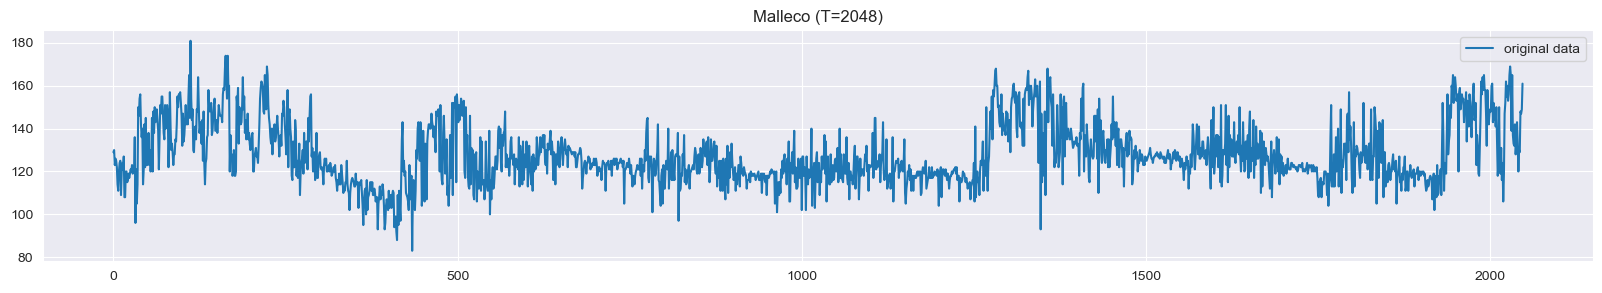

In [15]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_babyecg['x'], label="original data")
# plt.plot(df_babyecg['x'].diff(), label="diff")
plt.legend()
plt.title("Malleco (T=2048)")
plt.show()

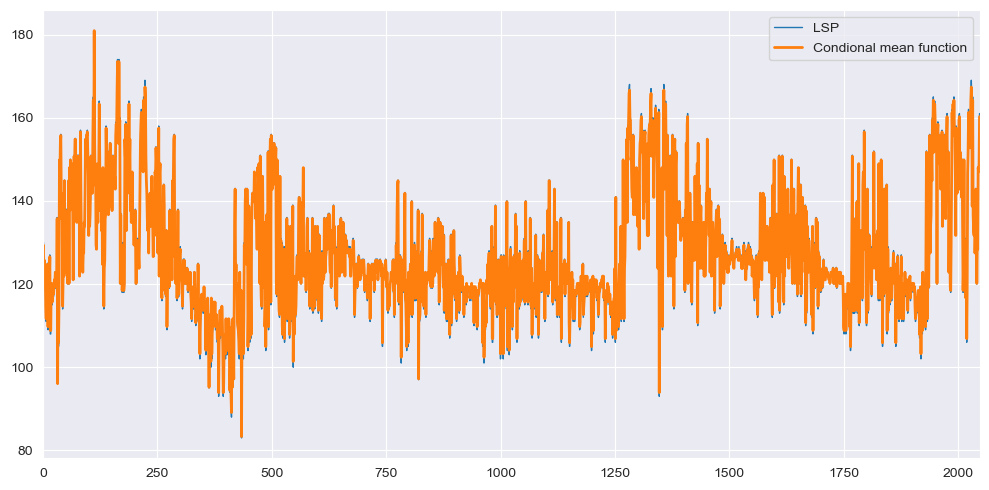

In [18]:
# C = 2
space_kernel = "gaussian" # "silverman"
time_kernel = "uniform"
T = df_babyecg['x'].shape[0]
d = 1
bandwidth = T **(-0.4 / (d+1)) / 0.1
X_dict = df_babyecg['x'].values.reshape(-1,1) #df_malleco['Value'].diff().values.reshape(-1, 1)
X_tvar_2 = df_babyecg['x'].values #df_malleco['Value'].diff().values

GaussUnifKernel = Kernel(T=T, bandwidth=bandwidth, space_kernel=space_kernel, time_kernel=time_kernel)
GaussUnifKernel 
Y_t_T = df_babyecg['x'].values
weights = {}
for t in range(T):
    weights[str(t)] = GaussUnifKernel.fit(X_dict, t)
    
m_hat= [np.sum(weights[str(t)] * Y_t_T) for t in range(T)]

path_fig = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/figs/"
plt.rcParams["figure.figsize"] = (10,5)

u_var = np.linspace(0., 1., T)
plt.plot(X_tvar_2, lw=1, label="LSP")
plt.plot(np.array(m_hat), lw=2, label="Condional mean function")
plt.xlim(0, T)
plt.legend()
plt.tight_layout()
plt.savefig(path_fig+"locally_process_conditional_mean_Guassina_space_kernel_uniform_tiem_kernel.pdf", dpi=150)

In [24]:
from sklearn.metrics import root_mean_squared_error as rmse

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (/Users/mzalaya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [22]:
import sklearn.metrics as metrics


ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (/Users/mzalaya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [26]:
np.sqrt(((X_tvar_2 - np.array(m_hat)**2).mean()))

/var/folders/nn/3q6_mtc50k76l9qmq8wsp4780000gn/T/ipykernel_21633/3382466187.py:1: RuntimeWarning:

invalid value encountered in sqrt



nan

In [31]:
np.sqrt(np.mean((X_tvar_2 - np.array(m_hat))**2))

0.4508575628957093